<a href="https://colab.research.google.com/github/wolfgangmoon/Satelite/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')
df=pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.head()


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [87]:
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('[^0-9a-zA-Z_]+', '', regex=True))


In [88]:
df['regents_exam'] = df['regents_exam'].fillna('Unknown')

In [89]:
df = df.drop_duplicates()

In [90]:
num_cols = [
    'mean_score',
    'number_scoring_below_65',
    'percent_scoring_below_65',
    'number_scoring_65_or_above',
    'percent_scoring_65_or_above',
    'number_scoring_80_or_above',
    'percent_scoring_80_or_above',
    'number_scoring_cr',
    'percent_scoring_cr'
]

# Convert identified numerical columns to numeric, coercing errors
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now drop rows where all values in these numerical columns are NaN
df = df.dropna(subset=num_cols, how='all')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133531 entries, 1 to 212325
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   school_dbn                   133531 non-null  object 
 1   school_name                  133531 non-null  object 
 2   school_level                 133531 non-null  object 
 3   regents_exam                 133531 non-null  object 
 4   year                         133531 non-null  int64  
 5   total_tested                 133531 non-null  int64  
 6   mean_score                   133531 non-null  float64
 7   number_scoring_below_65      133531 non-null  float64
 8   percent_scoring_below_65     133531 non-null  float64
 9   number_scoring_65_or_above   133531 non-null  float64
 10  percent_scoring_65_or_above  133531 non-null  float64
 11  number_scoring_80_or_above   133531 non-null  float64
 12  percent_scoring_80_or_above  133531 non-null  float64
 13  numb

In [92]:
df.isnull()

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212321,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212322,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212323,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212324,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [93]:
display(df.head())

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.90,1.00,6.30,15.00,93.80,7.00,43.80,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.00,1.00,11.10,8.00,88.90,2.00,22.20,NaN,NaN
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.40,3.00,33.30,6.00,66.70,0.00,0.00,NaN,NaN
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.60,2.00,13.30,13.00,86.70,5.00,33.30,NaN,NaN
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.40,5.00,55.60,4.00,44.40,1.00,11.10,NaN,NaN


In [94]:
print(df.columns)

Index(['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr'],
      dtype='object')


In [95]:
display(df)

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.90,1.00,6.30,15.00,93.80,7.00,43.80,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.00,1.00,11.10,8.00,88.90,2.00,22.20,NaN,NaN
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.40,3.00,33.30,6.00,66.70,0.00,0.00,NaN,NaN
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.60,2.00,13.30,13.00,86.70,5.00,33.30,NaN,NaN
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.40,5.00,55.60,4.00,44.40,1.00,11.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212321,84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.20,0.00,0.00,6.00,100.00,6.00,100.00,6.00,100.00
212322,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,87.00,0.00,0.00,6.00,100.00,6.00,100.00,6.00,100.00
212323,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,88.30,0.00,0.00,6.00,100.00,5.00,83.30,6.00,100.00
212324,84X717,Icahn Charter School,K-8,Living Environment,2015,8,76.50,1.00,12.50,7.00,87.50,2.00,25.00,NaN,NaN


In [96]:
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

,0
number_scoring_cr,65921
percent_scoring_cr,65921


In [97]:
print(df.shape)

(133531, 15)


In [98]:
df.head()

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.90,1.00,6.30,15.00,93.80,7.00,43.80,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.00,1.00,11.10,8.00,88.90,2.00,22.20,NaN,NaN
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.40,3.00,33.30,6.00,66.70,0.00,0.00,NaN,NaN
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.60,2.00,13.30,13.00,86.70,5.00,33.30,NaN,NaN
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.40,5.00,55.60,4.00,44.40,1.00,11.10,NaN,NaN


In [99]:
df = df.replace({
    "s": np.nan,
    "S": np.nan,
    "na": np.nan,
    "NA": np.nan,
    "N/A": np.nan,
    "": np.nan
})

In [100]:
df.head()

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.90,1.00,6.30,15.00,93.80,7.00,43.80,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.00,1.00,11.10,8.00,88.90,2.00,22.20,NaN,NaN
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.40,3.00,33.30,6.00,66.70,0.00,0.00,NaN,NaN
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.60,2.00,13.30,13.00,86.70,5.00,33.30,NaN,NaN
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.40,5.00,55.60,4.00,44.40,1.00,11.10,NaN,NaN


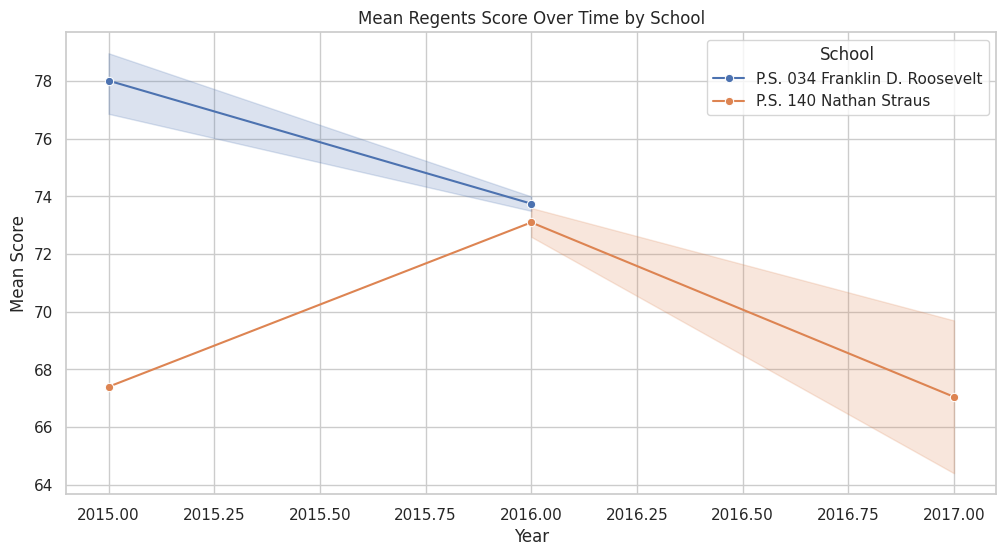

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

schools_to_compare = [
    "P.S. 034 Franklin D. Roosevelt",
    "P.S. 140 Nathan Straus"
]

# Ensure the data cleaning step is executed before plotting
df = df.replace({
    "s": np.nan,
    "S": np.nan,
    "na": np.nan,
    "NA": np.nan,
    "N/A": np.nan,
    "": np.nan
})

# Correct column names to match the DataFrame after renaming
subset = df[df['school_name'].isin(schools_to_compare)]

plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x='year', y='mean_score', hue='school_name', marker='o')

plt.title("Mean Regents Score Over Time by School")
plt.xlabel("Year")
plt.ylabel("Mean Score")
plt.grid(True)
plt.legend(title="School")
plt.show()